## Distributed SimBA attack against DeepAPI

Paper link: https://arxiv.org/abs/1905.07121

In [1]:
from bat.attacks import SimBA
from bat.apis.deepapi import DeepAPI_VGG16_Cifar10

In [2]:
import numpy as np
np.set_printoptions(suppress=True)

from PIL import Image

## Step 1: Load image and make predictions

In [3]:
# Load Image 
x = np.asarray(Image.open("dog.jpg").resize((32, 32)))

In [4]:
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
%matplotlib inline

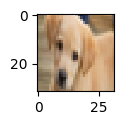

In [5]:
plt.figure(figsize = (1, 1))
plt.imshow(x, interpolation='nearest')

In [6]:
# Initialize the DeepAPI Model
model = DeepAPI_VGG16_Cifar10("http://localhost:8080")

In [7]:
# Get Preditction
y_pred = model.predict(np.array([x]))[0]

# Print result
model.print(y_pred)
print()
print('Prediction', np.argmax(y_pred), model.get_class_name(np.argmax(y_pred)))


dog        0.99965
horse      0.00023
deer       0.00003
bird       0.00002
cat        0.00002
airplane   0.00001
automobile 0.00001
frog       0.00001
truck      0.00000
ship       0.00000

Prediction 4 dog


## Step 2: Apply the SimpleBA Attack

In [8]:
simba = SimBA(model)
x_adv = simba.attack(np.array([x]), np.argmax(y_pred), epsilon=0.1, max_it=3000, concurrency=8)

Clean accuracy: 100.00%


Distributed SimBA Attack (Vertical):  37%|███▋      | 138/375 [01:42<02:55,  1.35it/s, Total Queries=2363.0, Mean Higest Prediction=0.553, Attack Success Rate=1, Avg Queries=2363.0]


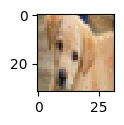

In [9]:
plt.figure(figsize = (1, 1))
plt.imshow(x_adv[0], interpolation='nearest')

In [10]:
# Get predictions after attack
y_adv = model.predict(x_adv)[0]

# Print result
model.print(y_adv)
print()
print('Prediction', np.argmax(y_adv), model.get_class_name(np.argmax(y_adv)))


horse      0.55309
dog        0.44473
cat        0.00095
deer       0.00066
bird       0.00035
airplane   0.00009
truck      0.00005
automobile 0.00004
frog       0.00002
ship       0.00001

Prediction 8 horse
